## N차 과제 - Time Series Analysis_주가예측

- 주제: 시계열 모델을 주가 데이터에 대한 시계열 예측 및 분석
- 데이터: 주식 데이터(크롤링 or 라이브러리로 데이터 불러오기)
- 사용 라이브러리: yfinance, datareader, statsmodels, matplotlib etc.

In [2]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 14.9 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/3.0 MB 21.8 MB/s eta 0:00:01
     --------------------------- ------------ 2.0/3.0 MB 18.5 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 21.0 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 17.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/94.6 kB ? eta -:--:--
   ---------------------------------------- 94.6/94.6 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/112.2 kB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


### 1. EDA 및 전처리

1.1 분석을 위해 사용할 특정 주식(1개)의 데이터를 불러오거나 크롤링하여 가져오세요(**최소 3년 이상의 데이터 추출 권고**).

In [4]:
start = '2019-01-01'
end = '2023-12-31'

ticker = 'PFE'

df = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,40.910816,41.271347,40.455406,41.034157,32.436306,26430315
2019-01-03,41.024670,41.119545,39.800758,39.886147,31.528830,28503533
2019-01-04,40.265656,41.129032,40.094875,40.796963,32.248810,27145348
2019-01-07,40.863377,41.385201,40.664139,41.015179,32.421307,20995469
2019-01-08,41.328274,41.461102,40.939278,41.204933,32.571293,19677231
...,...,...,...,...,...,...
2023-12-22,28.440001,28.790001,28.180000,28.400000,27.179699,35087200
2023-12-26,28.430000,28.530001,28.250000,28.410000,27.189272,30119100
2023-12-27,28.469999,28.730000,28.309999,28.610001,27.380676,35000700


1.2 결측치가 있는지 확인하고 있다면 제거해주세요.

In [6]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

1.3 일자를 인덱스로 설정하고 시간 순서대로 정렬하세요.

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,40.910816,41.271347,40.455406,41.034157,32.436306,26430315
2019-01-03,41.024670,41.119545,39.800758,39.886147,31.528830,28503533
2019-01-04,40.265656,41.129032,40.094875,40.796963,32.248810,27145348
2019-01-07,40.863377,41.385201,40.664139,41.015179,32.421307,20995469
2019-01-08,41.328274,41.461102,40.939278,41.204933,32.571293,19677231
...,...,...,...,...,...,...
2023-12-22,28.440001,28.790001,28.180000,28.400000,27.179699,35087200
2023-12-26,28.430000,28.530001,28.250000,28.410000,27.189272,30119100
2023-12-27,28.469999,28.730000,28.309999,28.610001,27.380676,35000700


1.4 수정종가(adj close)와 거래량(volume)을 시각화하세요.

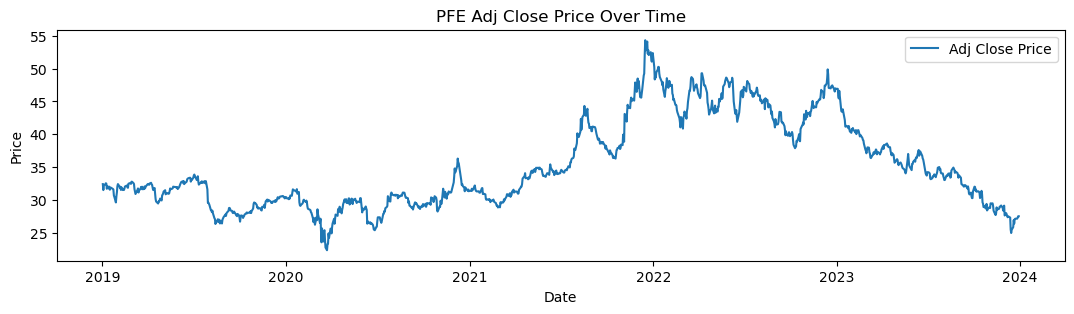

In [14]:
plt.figure(figsize=(13, 3))
plt.plot(df.index, df['Adj Close'], label='Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PFE Adj Close Price Over Time')
plt.legend()

plt.show()

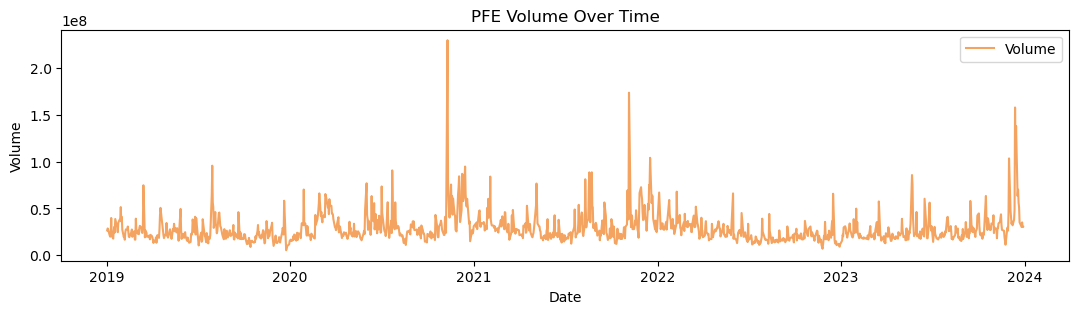

In [18]:
plt.figure(figsize=(13, 3))
plt.plot(df.index, df['Volume'], color = 'sandybrown', label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('PFE Volume Over Time')
plt.legend()

plt.show()

1.5 위 시각화 과정을 통해 알 수 있는 내용에 대해 작성하세요.

화이자의 수정종가는 2022년까지는 상승세였지만, 그 이후로는 계속 하락하고 있다.
거래량은 주로 연말에 많아지고, 2020년 하반기에 최고 거래량을 찍었다.

### 2. 추세 및 정상성 검정

2.1 시계열 데이터의 정상성을 검증하도록 하겠습니다. 시계열 데이터 말하는 정상성(stationarity)이 무엇인지 왜 해야 하며 비정상성의 해결 방법에는 무엇이 있는지 작성하세요.

정상성(stationarity)은 시계열의 평균과 분산이 일정하고, 특정한 트렌드 (추세)가 존재하지 않는 성질을 의미함.
시간에 무관하게 과거, 현재, 미래의 분포가 같아야 함.

비정상성을 해결하는 방법에는 차분(Differencing)과 로그변환이 있다.

차분은 t시점과 t−1시점의 값의 차이를 구하는 것을 의미한다.

로그변환은 값의 변동이 클 때 사용하고, 선형적인 값으로 바꿔주는 효과가 있다. 시계열 값에 로그를 취해주면 된다.

보통은 두 방법을 모두 사용해 로그변환 후 차분을 하는 방식으로 사용한다.

2.2 먼저 ADF Test를 수행하겠습니다. statsmodels의 adfuller 라이브러리를 import 한 후 수정 종가에 대한 검정을 수행하고 결과를 출력하세요(p-value 포함).

ADF Test란? - https://hongl.tistory.com/98

In [20]:
result = adfuller(df['Adj Close'])

print(f'ADF statistics : {result[0]}')
print(f'p-value {result[1]}')
print('critical values: ')
for key, value in result[4].items():
    print(f"\t{key} {value}")

ADF statistics : -1.4716256196467163
p-value 0.5474981503335847
critical values: 
	1% -3.435660336370594
	5% -2.863885022214541
	10% -2.568018522153254


2.3 ADF Test 결과를 해석하세요.

ADF statistics는 검정 통계량으로, 검정 결과가 음수일수록 시계열 데이터가 안정적이라는 것을 의미
p-value는 귀무가설이 맞을 확률을 나타내며, 이 값이 0.05보다 작으면 귀무가설을 기각하고, 시계열 데이터가 안정적이라는 결론을 내릴 수 있다. 
반대로, 이 값이 0.05보다 크면 귀무가설을 기각하지 못하고, 시계열 데이터가 안정적이 아니라 불안정(non-stationary) 하다고 판단하여 분석에 주의해야 한다.

p-value가 0.05이상이므로 귀무가설을 기각하지 못하고 non-stationary하다.
ADF statistics도 각 critical value보다 높으므로 stationary하지 않다.

2.4 ACF 그래프와 PACF 그래프를 그려보도록 하겠습니다. 먼저 ACF와 PACF 각각이 어떻게 다른지 설명하세요.

ACF는 k시간단위로 구분된 시계열관측치 간의 y_t와 y_t+k간의 상관관계를 측정한다.
ACF의 반환값의 절대값이 커질수록 시차 시계열데이터 간의 상관성이 크다고 할 수 있다.

정상 시계열의 경우 ACF는 상대적으로 빨리 0(상관관계가 0)으로 접근한다.
비정상 시계열의 경우 ACF는 천천히 감소하며 종종 큰 양의 값을 가진다.

PACF는 ACF가 모든 시계열의 데이터의 특성을 분석하는 데 한계가 있어 이를 보충하기 위해 하는 부분자기상관함수이다.
시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성을 나타낸다.
ex) t시점과 t-1의 연관성, 그리고 t와 t-2의 연관성
(이때 t-1와의 연관성은 제외한다. 순수하게 특정 시점간의 연관성(correlation)만 생각하고 사이에 있는 시점들의 연관성은 제외한다.)

2.5 statsmodels의 plot_acf, plot_pacf 라이브러리를 import하고 Adj close값에 대한 ACF, PACF 그래프를 출력하세요.

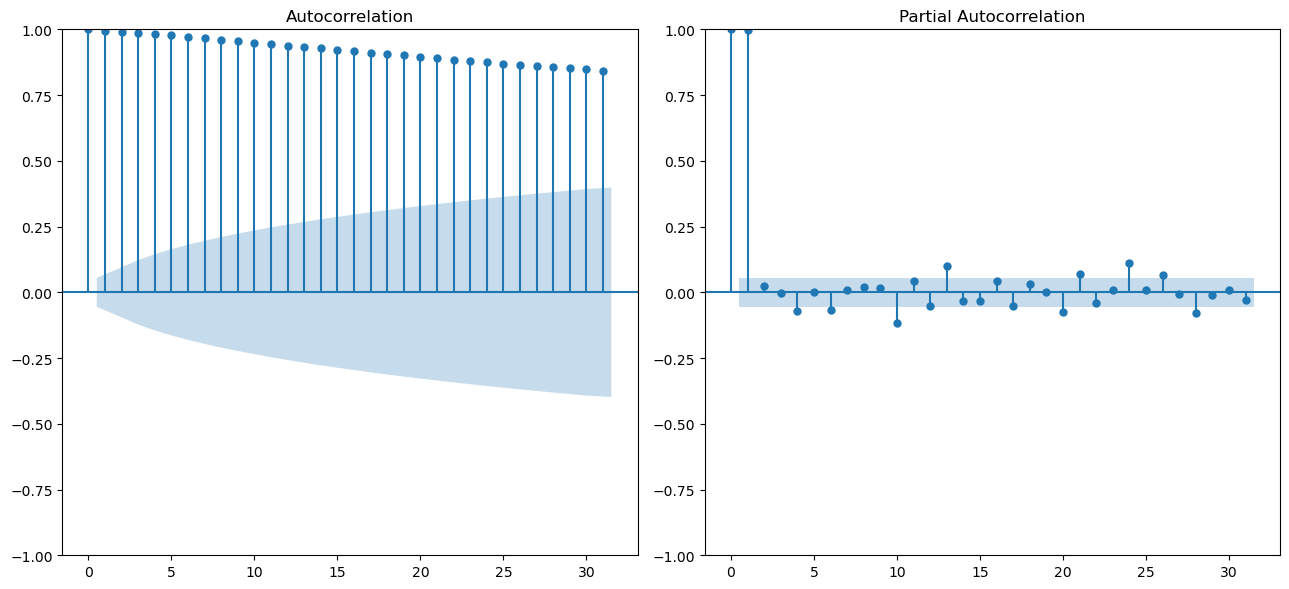

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

plot_acf(df['Adj Close'], ax=axes[0], title='Autocorrelation')
plot_pacf(df['Adj Close'], ax=axes[1], title='Partial Autocorrelation')

plt.tight_layout()
plt.show()

2.6 결과를 해석하세요.

왼쪽의 ACF그래프를 보면 모든 값 1에 가까운 값을 가지며 매우 천천히 correlation이 내려가고 있고 신뢰구간 안에 들어가지 않는다.
즉, 비정상성을 가지고 있다.

오른쪽의 PACF그래프를 보면 첫 값에서 매우 높은 부분 자기상관이 나타나며, 이후에는 급격히 0 근처로 수렴한다. 
이는 AR(1) 모델이 적합할 가능성이 있음을 가리킨다.

2.7 마지막으로 계절성이 있는지 여부를 확인하겠습니다. statsmodels의 seasonal_decompose 라이브러리를 import하고 plot을 출력하세요.

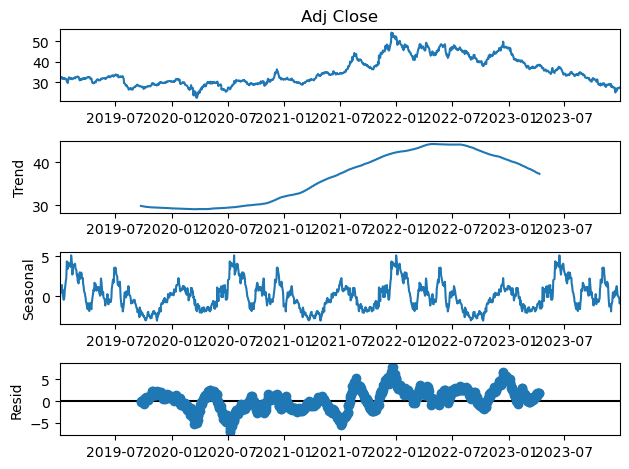

In [30]:
season = seasonal_decompose(df['Adj Close'], model='additive', period=365) #연간패턴을 보기 위해 period를 365로 설정
season.plot()

plt.show()

2.8 위 결과를 해석하세요.

원본 데이터\
Trend: 장기적인 추세\
Seasonal: 주기적인 패턴, 즉 계절성\
Residual: 추세와 계절성을 제거한 후 남은 잔차

Trend: 전체적으로 주가가 상승하다가 어느 시점에서부터 하락하는 추세를 보임.\
Seasonal: 주기적으로 변동하는 모습을 보이며, 일반적으로 매년 반복되는 패턴을 나타냄, 연중 특정 시점에 상승하거나 하락하는 경향이 있음\
Residual: 잔차는 주가의 비정상적인 변동을 나타내며, 평균적으로 0 근처에 위치한다. 이 그래프에서는 변동이 다소 커 잔차가 안정적이지 않다.

2.9 위에서 진행한 검정 과정 및 시각화 결과를 종합해봤을 때 현 데이터는 비정상성임을 알 수 있습니다. 따라서 차분을 통해 이를 해결하도록 하겠습니다. 먼저 차분이 어떤 것인지에 대해 설명하세요.

차분은 시계열 데이터의 안정성을 높이고, 시계열의 추세나 계절성을 제거하기 위해 사용되는 기법이다.\
주로 ARIMA(AutoRegressive Integrated Moving Average)와 같은 시계열 분석 방법에서 자주 사용되며, \
시계열 데이터가 정상적(stationary)이 아닌 경우 사용한다.

현재 시점의 값에서 이전 시점의 값을 빼는 방식으로 계산된다.

1차 차분 (First Difference)은 각 관측치에서 바로 이전 관측치를 빼는 것이고, \
n차 차분 (Higher Order Difference)은 n번 이전 관측치를 빼는 것이다.

2.10 1차 차분을 진행하도록 하겠습니다. diff() 함수를 활용해 1차 차분을 진행한 후 ADF Test를 수행하여 정상성 여부를 확인하세요.

In [48]:
df['first_diff'] = df['Adj Close'].diff() 

first_diff = df['first_diff'].dropna() # 차분 후 결측치가 생겨 제거

In [49]:
adf_diff = adfuller(first_diff)

print(f'ADF statistics : {adf_diff[0]}')
print(f'p-value {adf_diff[1]}')
print('critical values: ')
for key, value in adf_diff[4].items():
    print(f"\t{key} {value}")

ADF statistics : -7.728840310280936
p-value 1.1396831986774617e-11
critical values: 
	1% -3.435660336370594
	5% -2.863885022214541
	10% -2.568018522153254


2.11 추가로 위에서 그려보았던 plot들을 다시 그려보면서 비교를 통해 정상성 여부를 확인해보도록 하겠습니다. ACF PACF plot, 계절성 분해 plot을 그려보세요.

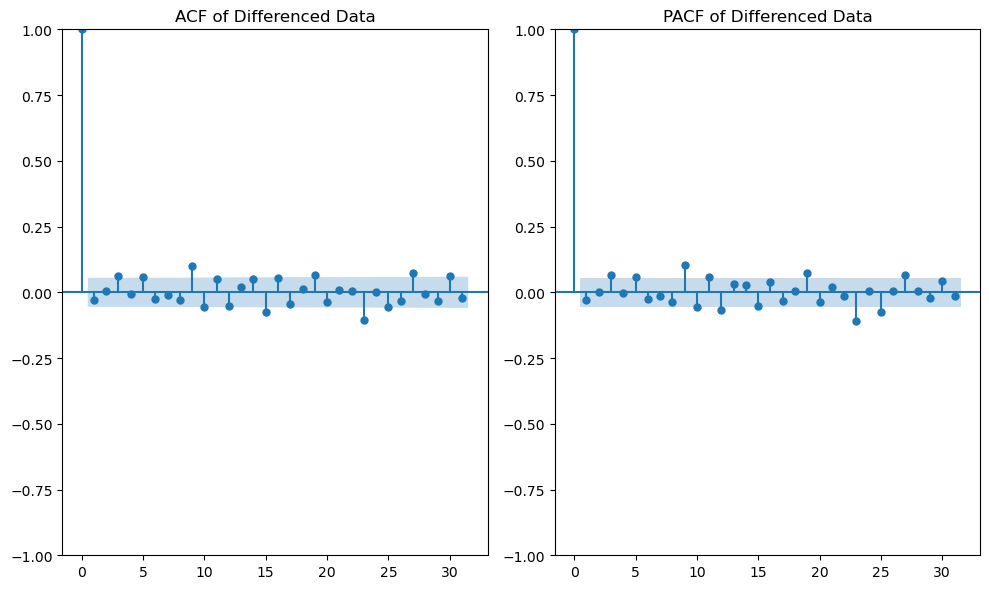

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

plot_acf(first_diff, ax=axes[0], title='ACF of Differenced Data')
plot_pacf(first_diff, ax=axes[1], title='PACF of Differenced Data')

plt.tight_layout()
plt.show()

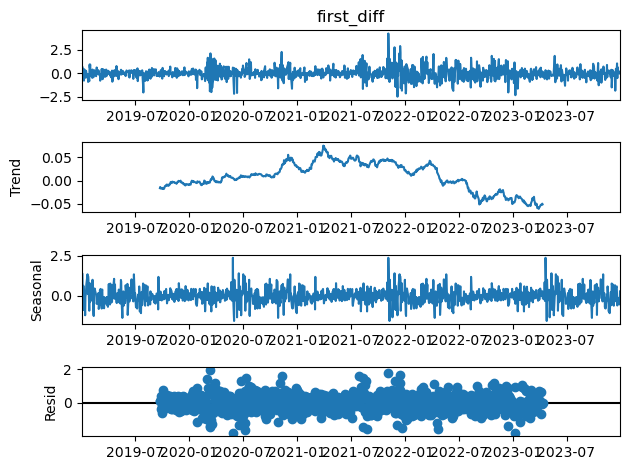

In [55]:
season_diff = seasonal_decompose(first_diff, model='additive', period=365)
season_diff.plot()

plt.show()

### 3. 예측

3.1 데이터의 정상성을 확인했으니 본격적으로 예측 및 분석을 진행해보도록 하겠습니다.

아래 코드는 예시이므로 예시에서 사용된 모델이 아닌 다른 모델(ex. ARIMAX, ARCH/GARCH, LSTM, Transformer, DLinear etc.)를 사용하고 애플이 아닌 다른 주식을 사용해 예측 및 분석을 진행해주세요(**위에서 진행한 과정 역시 모두 예시이므로 새로운 주식에 대한 전처리 및 정상성 검정을 새로 진행해야 함**).

In [88]:
df['Adj Close']

Date
2019-01-02    32.436306
2019-01-03    31.528830
2019-01-04    32.248810
2019-01-07    32.421307
2019-01-08    32.571293
                ...    
2023-12-22    27.179699
2023-12-26    27.189272
2023-12-27    27.380676
2023-12-28    27.552944
2023-12-29    27.552944
Name: Adj Close, Length: 1258, dtype: float64

In [89]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [91]:
data = df['Adj Close'].values
data = data.reshape(-1, 1)

In [92]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [93]:
# 과거 100일을 보고 다음날을 예측
def create_dataset(dataset, time_step=100):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 100
X, y = create_dataset(scaled_data, time_step)

In [94]:
# 입력 데이터 형태 변경: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) #훈련, 테스트셋 분할

In [95]:
# LSTM 모델
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\sihyun\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [96]:
model.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0015 - val_loss: 6.7732e-04
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0012 - val_loss: 6.8161e-04
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0012 - val_loss: 8.4363e-04
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0012 - val_loss: 7.3263e-04
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0012 - val_loss: 5.5019e-04
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0012 - val_loss: 9.3623e-04
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 0.0012 - val_loss: 6.5597e-04
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 9.8210e-04 - val_loss: 5.9825e-04
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0010 - val_loss: 7.3233e-04
Epoch 12/50
15/15 ━━

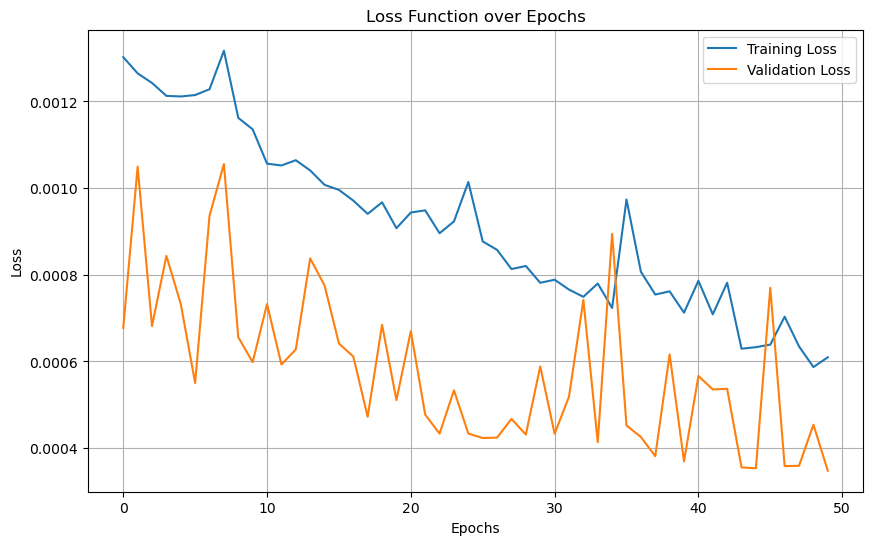

In [98]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1, validation_data=(X_test, y_test))

# 훈련 손실, 검증 손실 저장
loss = history.history['loss']  # 훈련 손실
val_loss = history.history['val_loss']  # 검증 손실

# 에폭 수에 따른 손실 함수 감소 추이 시각화
plt.figure(figsize=(10,6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Function over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [99]:
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


In [100]:
# 복원
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

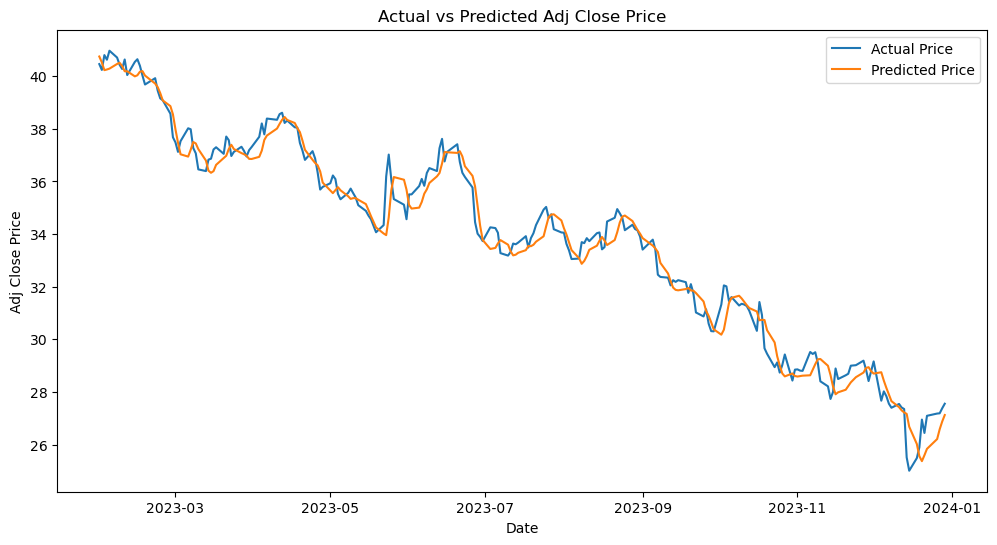

In [101]:
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Price')
plt.plot(df.index[-len(y_pred):], y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [102]:
from sklearn.metrics import mean_squared_error

# RMSE 출력
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 0.59528138474767
